# Tests for pytorch lightning

Created by Jacob A Rose on Thursday Oct 21st, 2021

In [20]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
from pathlib import Path




broken_img = Path("/media/data_cifs/projects/prj_fossils/data/processed_data/leavesdb-v1_0/images/Fossil/Florissant_Fossil/512/3/jpg/Rosaceae/Rosaceae_Cercocarpus_myricaefolius_Florissant_FLFO_010395.jpg")
img_dir = broken_img.parent

from PIL import Image
import os
import cv2
import skimage
import numpy as np
# os.path.isfile(broken_img)
# img = cv2.imread(broken_img)
# print(len(os.listdir(Path(broken_img).parent)))
# img = Image.open(broken_img)

In [7]:
from PIL.Image import UnidentifiedImageError

In [8]:
from tqdm.auto import tqdm

failures = []
paths = os.listdir(img_dir)
for fname in tqdm(paths):
    print(fname)
    try:
        img_path = img_dir / fname
        img = Image.open(img_path)
#         print(f"[success] {fname} : {np.array(img).shape}")
    except UnidentifiedImageError as e:
        failures.append(img_path)
        print(f"[failure] {fname}")

        
print(f"{len(paths) - len(failures)} successes, {len(failures)} failures")



In [34]:
import copy
import re
from lightning_hydra_classifiers.data.utils.generate_multires_images import resize_and_save_img





def find_parent_dataset_path(path, replace_resolution: dict=None, replace_threshold: dict=None):
    replacement_path = copy.copy(path)
    if isinstance(replace_resolution, dict):
        old, new = list(replace_resolution.items())[0]
        replacement_path = re.sub(str(old), str(new), str(replacement_path))
#         replacement_path = re.sub(str(replace_resolution), "original", str(replacement_path))
#     if isinstance(int(threshold), int):
    if isinstance(replace_threshold, dict):
        old, new = list(replace_threshold.items())[0]
        replacement_path = re.sub(str(old), str(new), str(replacement_path))
#         replacement_path = re.sub(f"/{threshold}/", "/full/", str(replacement_path))
        
    if replacement_path == path:
        print("No changes made")
    
    return replacement_path



# replacement_path = re.sub(f"/{threshold}/", "/full/", str(path))

# replacement_path = re.sub(str(resolution), "original", str(path))
# replacement_path = re.sub(f"/{threshold}/", "/full/", str(replacement_path))
# target_path = replacement_path
# resize_and_save_img(img=img,
#                     target_path=path,
#                     target_shape=(3, resolution, resolution))

In [33]:

#         old, new = list(replace_resolution.items())

replace_resolution = {f"/{resolution}/": "/original/"}
list(replace_resolution.items())

[('/512/', '/original/')]

In [29]:
# os.path.isfile(replacement_path)
# len(os.listdir(Path(replacement_path).parent))
# len(os.listdir(Path(path).parent))
# Image.open(replacement_path)

In [36]:
# processed_failures = []
found_replacements = []
still_broken = []
for path in failures:
    
#     processed_failures.append(
    replacement_path = find_parent_dataset_path(path, 
                                                replace_resolution=None,
                                                replace_threshold={f"/{threshold}/": "/full/"})
    
    try:
        img = Image.open(replacement_path)
        found_replacements.append(replacement_path)
    except UnidentifiedImageError as e:
        print(e, Path(replacement_path))
        try:
            replacement_path = find_parent_dataset_path(path, 
                                            replace_resolution={f"/{resolution}/": "/original/"},
                                            replace_threshold={f"/{threshold}/": "/full/"})

            img = Image.open(replacement_path)
            found_replacements.append(replacement_path)
        except UnidentifiedImageError as e:
            print(e, Path(replacement_path))
            found_replacements = []
            still_broken.append(replacement_path)
print(f"found: {len(found_replacements)}")
print(f"Total failures: {len(still_broken)}")
#         print(f"[failure] {fname}")

cannot identify image file '/media/data_cifs/projects/prj_fossils/data/processed_data/leavesdb-v1_0/images/Fossil/Florissant_Fossil/512/full/jpg/Rosaceae/Rosaceae_Cercocarpus_myricaefolius_Florissant_FLFO_010395.jpg' /media/data_cifs/projects/prj_fossils/data/processed_data/leavesdb-v1_0/images/Fossil/Florissant_Fossil/512/full/jpg/Rosaceae/Rosaceae_Cercocarpus_myricaefolius_Florissant_FLFO_010395.jpg
found: 1
Total failures: 0


In [38]:
found_replacements

['/media/data_cifs/projects/prj_fossils/data/processed_data/leavesdb-v1_0/images/Fossil/Florissant_Fossil/original/full/jpg/Rosaceae/Rosaceae_Cercocarpus_myricaefolius_Florissant_FLFO_010395.jpg']

Broken: /media/data_cifs/projects/prj_fossils/data/processed_data/leavesdb-v1_0/images/Fossil/Florissant_Fossil/512/3/jpg/Rosaceae/Rosaceae_Cercocarpus_myricaefolius_Florissant_FLFO_010395.jpg
Replacement source: /media/data_cifs/projects/prj_fossils/data/processed_data/leavesdb-v1_0/images/Fossil/Florissant_Fossil/original/full/jpg/Rosaceae/Rosaceae_Cercocarpus_myricaefolius_Florissant_FLFO_010395.jpg
target_path: /media/data_cifs/projects/prj_fossils/data/processed_data/leavesdb-v1_0/images/Fossil/Florissant_Fossil/512/full/jpg/Rosaceae/Rosaceae_Cercocarpus_myricaefolius_Florissant_FLFO_010395.jpg


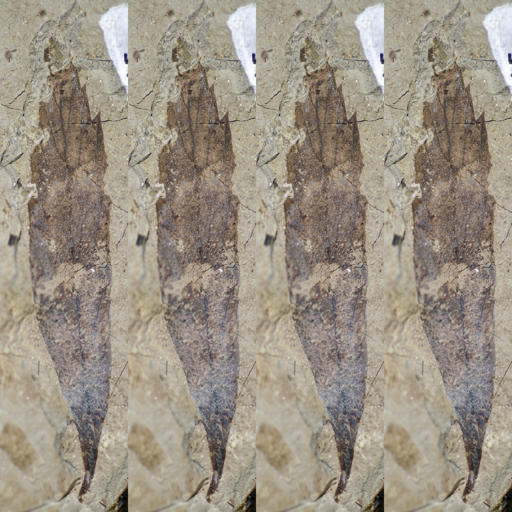

In [44]:
replacement_path = found_replacements[0]
path = failures[0]


target_path = find_parent_dataset_path(path,
                                       replace_resolution=None,
                                       replace_threshold={f"/{threshold}/": "/full/"})

print(f"Broken: {path}")
print(f"Replacement source: {replacement_path}")
print(f"target_path: {target_path}")
img = Image.open(replacement_path)

resize_and_save_img(img=img,
                    target_path=target_path,
                    target_shape=(3, resolution, resolution))


Image.open(target_path)

In [61]:
get_file_size(path=replacement_path) //1000

5095

In [56]:
from typing import *
def get_file_size(path: Union[str, Path]) -> int:
    """Return a file's size in raw bytes"""
    return Path(path).stat().st_size

def check_valid_file_size(path, min_bytes: int=1024) -> bool:
    """Return True if the file contains at least >= min_bytes"""
    return get_file_size(path) >= min_bytes

In [57]:
print(target_path)
print(f"{Path(target_path).stat().st_size // 1000} kB")

/media/data_cifs/projects/prj_fossils/data/processed_data/leavesdb-v1_0/images/Fossil/Florissant_Fossil/512/full/jpg/Rosaceae/Rosaceae_Cercocarpus_myricaefolius_Florissant_FLFO_010395.jpg
266 kB


In [58]:
print(path)
print(f"{Path(path).stat().st_size // 1000} kB")

/media/data_cifs/projects/prj_fossils/data/processed_data/leavesdb-v1_0/images/Fossil/Florissant_Fossil/512/3/jpg/Rosaceae/Rosaceae_Cercocarpus_myricaefolius_Florissant_FLFO_010395.jpg
266 kB


In [48]:
Path(path).stat().st_size // 1000

266

In [41]:
print(f"Broken: {path}")
print(f"Replacement source: {replacement_path}")
print(f"target_path: {target_path}")

Broken: /media/data_cifs/projects/prj_fossils/data/processed_data/leavesdb-v1_0/images/Fossil/Florissant_Fossil/512/3/jpg/Rosaceae/Rosaceae_Cercocarpus_myricaefolius_Florissant_FLFO_010395.jpg
Replacement source: /media/data_cifs/projects/prj_fossils/data/processed_data/leavesdb-v1_0/images/Fossil/Florissant_Fossil/original/full/jpg/Rosaceae/Rosaceae_Cercocarpus_myricaefolius_Florissant_FLFO_010395.jpg
target_path: /media/data_cifs/projects/prj_fossils/data/processed_data/leavesdb-v1_0/images/Fossil/Florissant_Fossil/512/full/jpg/Rosaceae/Rosaceae_Cercocarpus_myricaefolius_Florissant_FLFO_010395.jpg


['/media/data_cifs/projects/prj_fossils/data/processed_data/leavesdb-v1_0/images/Fossil/Florissant_Fossil/original/full/jpg/Rosaceae/Rosaceae_Cercocarpus_myricaefolius_Florissant_FLFO_010395.jpg']

In [42]:
img = Image.open(target_path)

UnidentifiedImageError: cannot identify image file '/media/data_cifs/projects/prj_fossils/data/processed_data/leavesdb-v1_0/images/Fossil/Florissant_Fossil/512/full/jpg/Rosaceae/Rosaceae_Cercocarpus_myricaefolius_Florissant_FLFO_010395.jpg'

In [43]:
os.path.isfile(target_path)

True

In [ ]:
#     processed_failures.append(re.sub())



failures = []
paths = os.listdir(img_dir)
for fname in tqdm(paths):
    print(fname)
    try:
        img_path = img_dir / fname
        img = Image.open(img_path)
#         print(f"[success] {fname} : {np.array(img).shape}")
    except UnidentifiedImageError as e:
        failures.append(img_path)
        print(f"[failure] {fname}")

        
print(f"{len(paths) - len(failures)} successes, {len(failures)} failures")

In [9]:
failures

[PosixPath('/media/data_cifs/projects/prj_fossils/data/processed_data/leavesdb-v1_0/images/Fossil/Florissant_Fossil/512/3/jpg/Rosaceae/Rosaceae_Cercocarpus_myricaefolius_Florissant_FLFO_010395.jpg')]

In [19]:
os.listdir("/media/data/jacob/GitHub/lightning-hydra-classifiers/lightning_hydra_classifiers/data/utils")

['__init__.py',
 'catalog_registry.py',
 'generate_multires_images.py',
 'make_catalogs.py',
 '.ipynb_checkpoints',
 'SmartCrop-refactor.py',
 '__pycache__',
 'generate_multithresh_symlink_trees.py',
 'clean_ipynb_ckpts.sh',
 'generate_all_data_multi-res-thresh.sh']

In [17]:
original_path = "/media/data_cifs/projects/prj_fossils/data/processed_data/leavesdb-v1_0/images/Fossil/Florissant_Fossil/original/full/jpg/Rosaceae/Rosaceae_Cercocarpus_myricaefolius_Florissant_FLFO_010395.jpg"

img = Image.open(original_path)

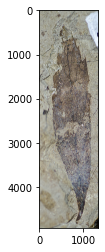

In [18]:
import matplotlib.pyplot as plt

plt.imshow(img)

## regressors

In [1]:
import os
import pytorch_lightning as pl
from pathlib import Path




import numpy as np

# Mock the ground truth, a one-dimensional array of floats
ground_truth = np.random.random(300)

# Mock the output of a few models
perfect_model = ground_truth
noisy_model = ground_truth + 0.1 * np.random.randn(*ground_truth.shape)
random_model = np.random.randn(*ground_truth.shape)
zero_model = np.zeros_like(ground_truth)
import metriculous

metriculous.compare_regressors(
    ground_truth=ground_truth,
    model_predictions=[perfect_model, noisy_model, random_model, zero_model],
    model_names=["Perfect Model", "Noisy Model", "Random Model", "Zero Model"],
).save_html("comparison.html").display()

,Quantity,Perfect Model,Noisy Model,Random Model,Zero Model
0,R^2,1.000,0.873,-16.278,-2.741
1,Explained Variance,1.000,0.873,-11.549,0.000
,Quantity,Perfect Model,Noisy Model,Random Model,Zero Model
0,MSE (Mean Squared Error),0.000,0.011,1.498,0.324
1,RMSE (Root Mean Squared Error),0.000,0.105,1.224,0.570
2,MAE (Mean Absolute Error),0.000,0.083,0.966,0.488
3,Max Absolute Error,0.000,0.325,3.770,0.994
4,Median Absolute Error,0.000,0.070,0.799,0.488
,Quantity,Perfect Model,Noisy Model,Random Model,Zero Model
0,Number of Samples,300.000,300.000,300.000,300.000


Loading BokehJS ...

sh: 1: afplay: not found


## classification

In [5]:
from random_word import RandomWords
r = RandomWords()

# Return a single random word


import numpy as np


def normalize(array2d: np.ndarray) -> np.ndarray:
    return array2d / array2d.sum(axis=1, keepdims=True)


# class_names = ["Cat", "Dog", "Pig"]
num_classes = 19
class_names = [r.get_random_word() for _ in range(num_classes)]
num_classes = len(class_names)
num_samples = 3000

# Mock ground truth
ground_truth = np.random.choice(range(num_classes), size=num_samples)# , p=[0.5, 0.4, 0.1])

# Mock model predictions
perfect_model = np.eye(num_classes)[ground_truth]
noisy_model = normalize(
    perfect_model + 2 * np.random.random((num_samples, num_classes))
)
random_model = normalize(np.random.random((num_samples, num_classes)))
import metriculous

metriculous.compare_classifiers(
    ground_truth=ground_truth,
    model_predictions=[perfect_model, noisy_model, random_model],
    model_names=["Perfect Model", "Noisy Model", "Random Model"],
    class_names=class_names,
    one_vs_all_figures=True).save_html("comparison.html").display()

FileExistsError: Path exists, refusing to overwrite 'comparison.html'

In [19]:
import numpy as np
import seaborn as sns
from sklearn.metrics import classification_report
import pandas as pd
from random_word import RandomWords
r = RandomWords()


num_classes = 19
num_samples = 5000
true = np.random.randint(0, num_classes, size=num_samples)
pred = np.random.randint(0, num_classes, size=num_samples)
labels = np.arange(num_classes)

target_names = [r.get_random_word() for _ in range(num_classes)]

# target_names = list("ABCDEFGHI")


clf_report = classification_report(true,
                                   pred,
                                   labels=labels,
                                   target_names=target_names,
                                   output_dict=True)
import matplotlib.pyplot as plt

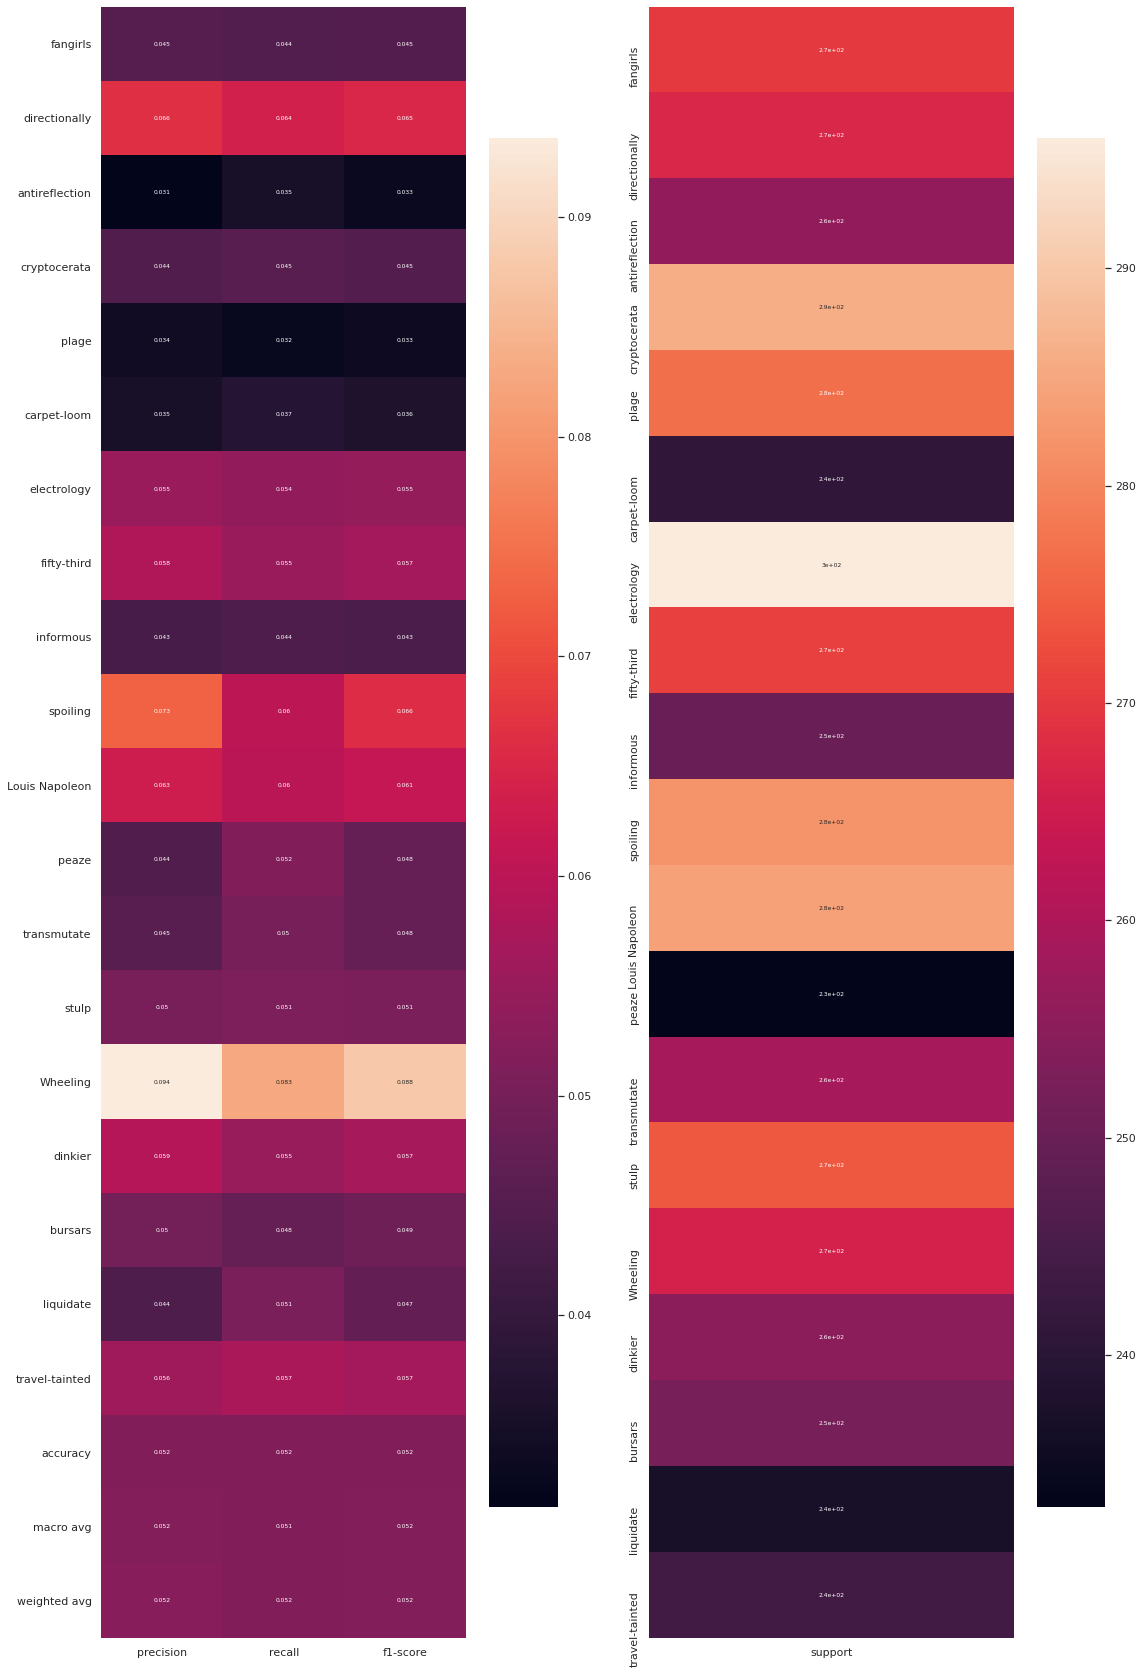

In [25]:
sns.set_theme(context="notebook")

# plt.figure(figsize=(15,29))
# # # .iloc[:-1, :] to exclude support
# sns.heatmap(pd.DataFrame(clf_report).iloc[:, :].T, annot=True, annot_kws={"fontsize":6})


# plt.figure(figsize=(15,29))
fig, ax = plt.subplots(1,2, figsize=(18,30))

sns.heatmap(pd.DataFrame(clf_report).iloc[:-1, :].T, annot=True, annot_kws={"fontsize":6}, ax=ax[0])
sns.heatmap(pd.DataFrame(clf_report).iloc[-1:, :-3].T, annot=True, annot_kws={"fontsize":6}, ax=ax[1])




# plt.figure(figsize=(28,15))
# # .iloc[:-1, :] to exclude support
# sns.heatmap(pd.DataFrame(clf_report).iloc[:-1, :], annot=True, annot_kws={"fontsize":6})

In [1]:
import numpy as np
import seaborn as sns
from sklearn.metrics import confusion_matrix
import pandas as pd
from random_word import RandomWords
r = RandomWords()

In [18]:
num_classes = 50
num_samples = 2000 #5000
true = np.random.randint(0, num_classes, size=num_samples)
pred = np.random.randint(0, num_classes, size=num_samples)
labels = np.arange(num_classes)

target_names = [r.get_random_word() for _ in range(num_classes)]

# target_names = list("ABCDEFGHI")


# clf_report = confusion_matrix(true,
#                               pred,
#                               labels=labels)
# import matplotlib.pyplot as plt

<BarContainer object of 171 artists>

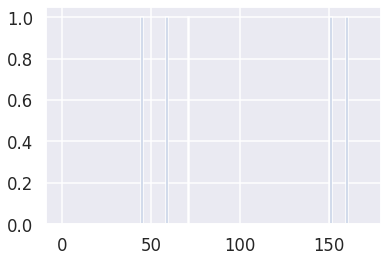

In [17]:
from sklearn.metrics import classification_report


plt.bar(range(len(clf_report[-1,:])), clf_report[-1,:])

In [ ]:
classification_report(

In [12]:
sns.set_theme("talk")

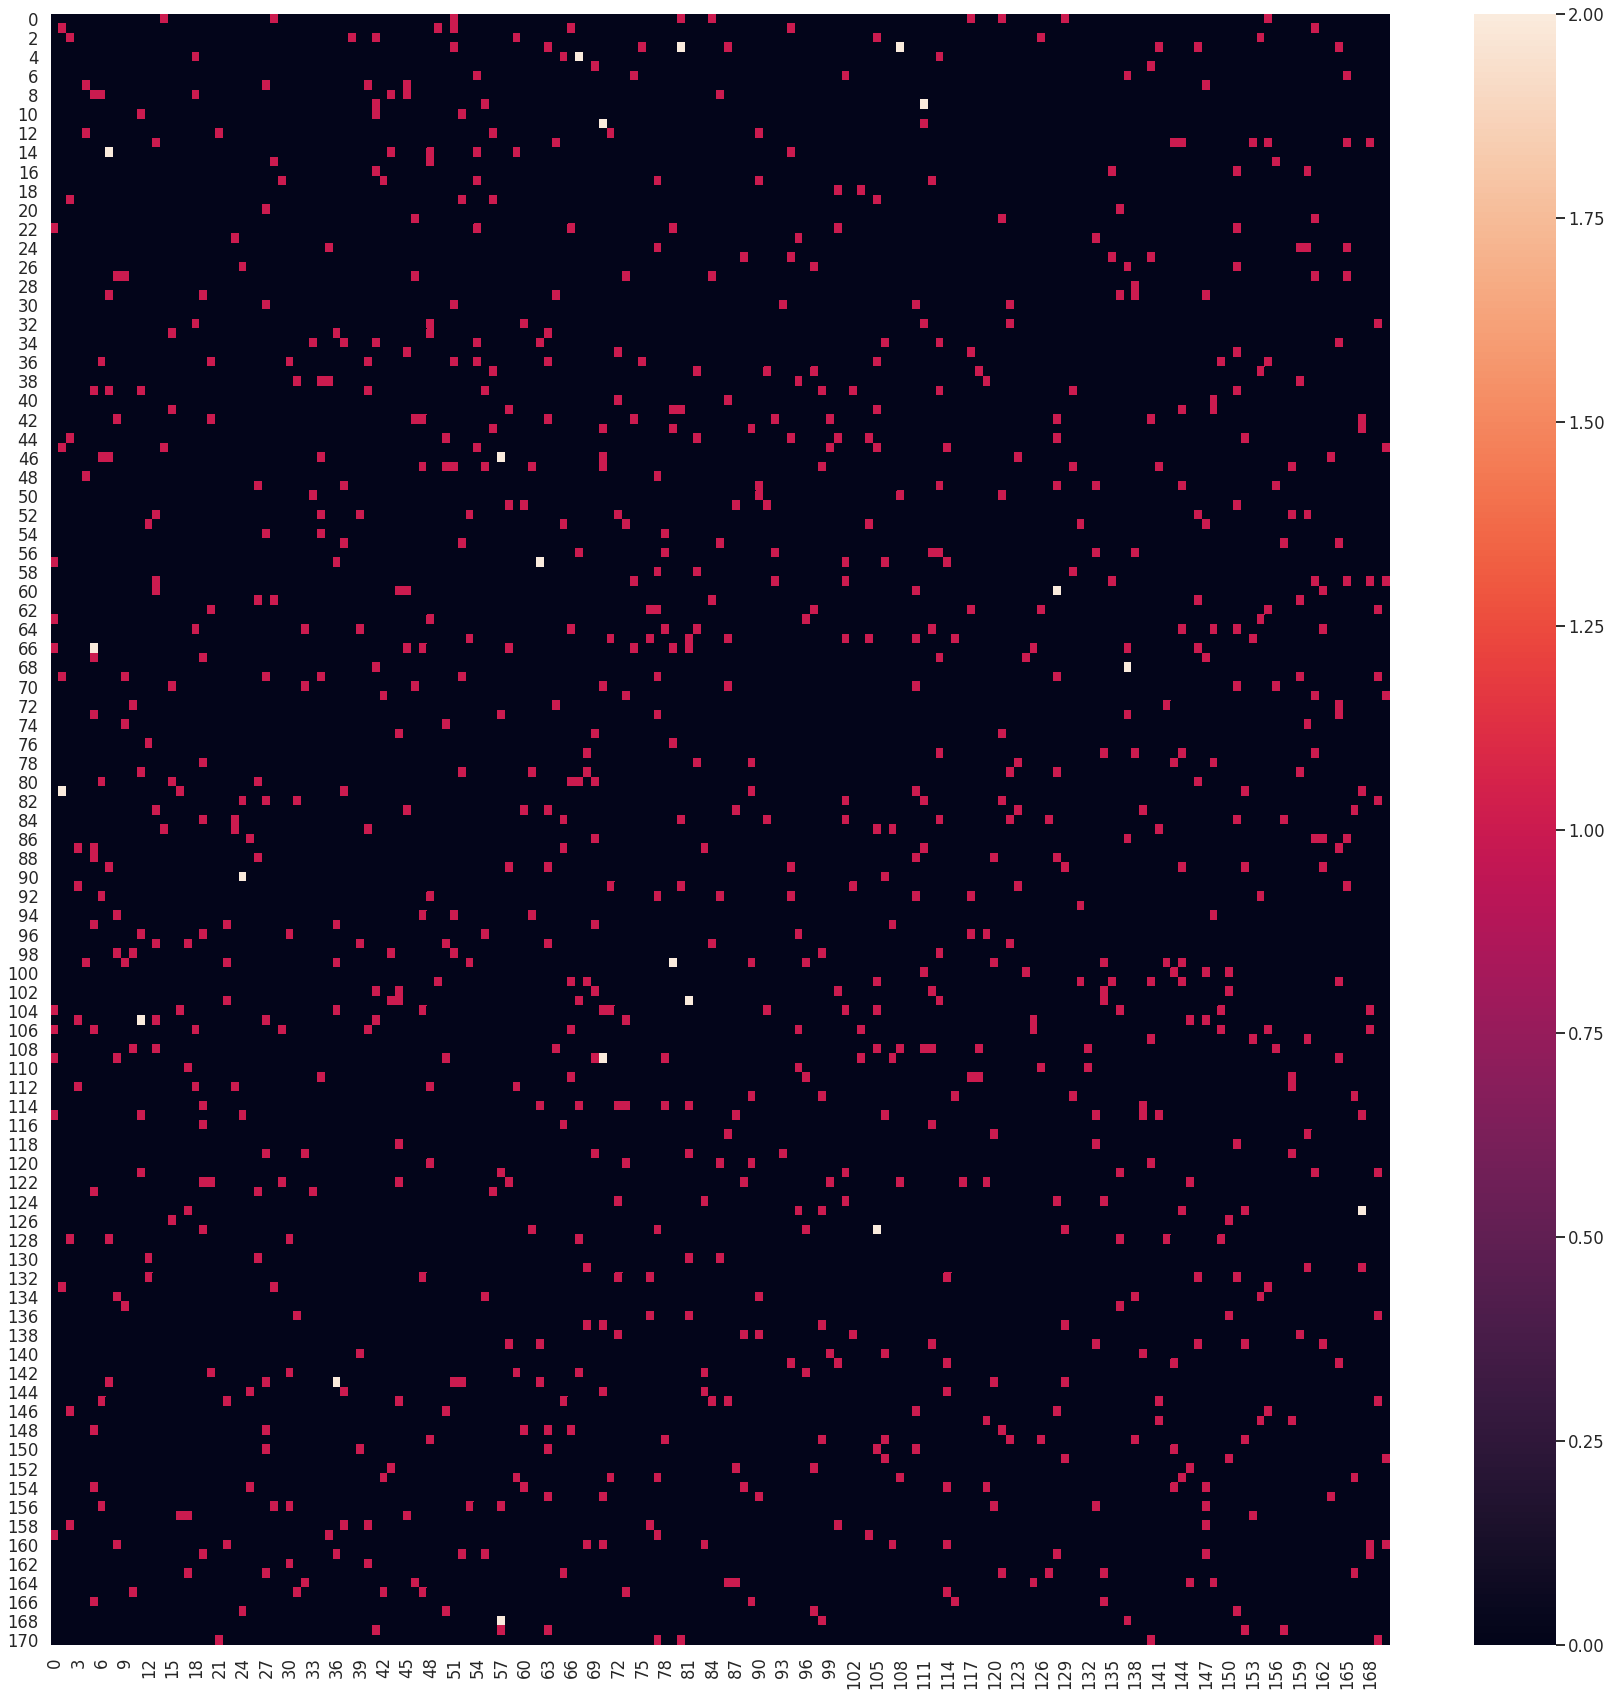

In [13]:
# sns.set_theme(context="notebook")

plt.figure(figsize=(30,30))
# # .iloc[:-1, :] to exclude support
sns.heatmap(pd.DataFrame(clf_report).iloc[:, :].T, annot=False, annot_kws={"fontsize":6})


# plt.figure(figsize=(28,15))
# # .iloc[:-1, :] to exclude support
# sns.heatmap(pd.DataFrame(clf_report).iloc[:-1, :], annot=True, annot_kws={"fontsize":6})

## old

In [12]:
%%writefile test_finetuning_callback.py

  
# Copyright The PyTorch Lightning team.
#
# Licensed under the Apache License, Version 2.0 (the "License");
# you may not use this file except in compliance with the License.
# You may obtain a copy of the License at
#
#     http://www.apache.org/licenses/LICENSE-2.0
#
# Unless required by applicable law or agreed to in writing, software
# distributed under the License is distributed on an "AS IS" BASIS,
# WITHOUT WARRANTIES OR CONDITIONS OF ANY KIND, either express or implied.
# See the License for the specific language governing permissions and
# limitations under the License.
from collections import OrderedDict

import pytest
import torch
from torch import nn
from torch.optim import Optimizer, SGD
from torch.utils.data import DataLoader

from pytorch_lightning import LightningModule, seed_everything, Trainer
from pytorch_lightning.callbacks import BackboneFinetuning, BaseFinetuning, ModelCheckpoint
from pytorch_lightning.callbacks.base import Callback
from tests.helpers import BoringModel, RandomDataset


class TestBackboneFinetuningCallback(BackboneFinetuning):
    def on_train_epoch_start(self, trainer, pl_module):
        super().on_train_epoch_start(trainer, pl_module)
        epoch = trainer.current_epoch
        if self.unfreeze_backbone_at_epoch <= epoch:
            optimizer = trainer.optimizers[0]
            current_lr = optimizer.param_groups[0]["lr"]
            backbone_lr = self.previous_backbone_lr
            if epoch < 6:
                assert backbone_lr <= current_lr
            else:
                assert backbone_lr == current_lr


def test_finetuning_callback(tmpdir):
    """Test finetuning callbacks works as expected."""

    seed_everything(42)

    class FinetuningBoringModel(BoringModel):
        def __init__(self):
            super().__init__()
            self.backbone = nn.Sequential(nn.Linear(32, 32, bias=False), nn.BatchNorm1d(32), nn.ReLU())
            self.layer = torch.nn.Linear(32, 2)
            self.backbone.has_been_used = False

        def training_step(self, batch, batch_idx):
            output = self(batch)
            loss = self.loss(batch, output)
            return {"loss": loss}

        def forward(self, x):
            self.backbone.has_been_used = True
            x = self.backbone(x)
            return self.layer(x)

        def configure_optimizers(self):
            optimizer = torch.optim.SGD(self.layer.parameters(), lr=0.1)
            lr_scheduler = torch.optim.lr_scheduler.StepLR(optimizer, step_size=1, gamma=0.7)
            return [optimizer], [lr_scheduler]

        def train_dataloader(self):
            return DataLoader(RandomDataset(32, 64), batch_size=2)

    model = FinetuningBoringModel()
    callback = TestBackboneFinetuningCallback(unfreeze_backbone_at_epoch=3, verbose=False)

    trainer = Trainer(limit_train_batches=4, default_root_dir=tmpdir, callbacks=[callback], max_epochs=8)
    trainer.fit(model)

    assert model.backbone.has_been_used


class TestBackboneFinetuningWarningCallback(BackboneFinetuning):
    def finetune_function(self, pl_module, epoch: int, optimizer, opt_idx: int):
        """Called when the epoch begins."""

        if epoch == 0:
            self.unfreeze_and_add_param_group(
                pl_module.backbone, optimizer, 0.1, train_bn=self.train_bn, initial_denom_lr=self.initial_denom_lr
            )


def test_finetuning_callback_warning(tmpdir):
    """Test finetuning callbacks works as expected."""

    seed_everything(42)

    class FinetuningBoringModel(BoringModel):
        def __init__(self):
            super().__init__()
            self.backbone = nn.Linear(32, 2, bias=False)
            self.layer = None
            self.backbone.has_been_used = False

        def training_step(self, batch, batch_idx):
            output = self(batch)
            loss = self.loss(batch, output)
            return {"loss": loss}

        def forward(self, x):
            self.backbone.has_been_used = True
            x = self.backbone(x)
            return x

        def train_dataloader(self):
            return DataLoader(RandomDataset(32, 64), batch_size=2)

#         def configure_optimizers(self):
#             optimizer = torch.optim.SGD(self.parameters(), lr=0.1)
#             return optimizer

        def configure_optimizers(self):
            optimizer = torch.optim.SGD(filter(lambda p: p.requires_grad, self.parameters()), lr=0.1)
            return optimizer

    chk = ModelCheckpoint(dirpath=tmpdir, save_last=True)

    model = FinetuningBoringModel()
    model.validation_step = None
    callback = TestBackboneFinetuningWarningCallback(unfreeze_backbone_at_epoch=3, verbose=False)

    with pytest.warns(UserWarning, match="Did you init your optimizer in"):
        trainer = Trainer(limit_train_batches=1, default_root_dir=tmpdir, callbacks=[callback, chk], max_epochs=2)
        trainer.fit(model)

    assert model.backbone.has_been_used
    trainer = Trainer(max_epochs=3, resume_from_checkpoint=chk.last_model_path)
    trainer.fit(model)


def test_freeze_unfreeze_function(tmpdir):
    """Test freeze properly sets requires_grad on the modules."""

    seed_everything(42)

    class FreezeModel(LightningModule):
        def __init__(self):
            super().__init__()
            self.backbone = nn.Sequential(nn.Linear(32, 32), nn.BatchNorm1d(32), nn.ReLU(), nn.Linear(32, 2))

    model = FreezeModel()
    BaseFinetuning.freeze(model, train_bn=True)
    assert not model.backbone[0].weight.requires_grad
    assert model.backbone[1].weight.requires_grad
    assert not model.backbone[3].weight.requires_grad

    BaseFinetuning.freeze(model, train_bn=False)
    assert not model.backbone[0].weight.requires_grad
    assert not model.backbone[1].weight.requires_grad
    assert not model.backbone[3].weight.requires_grad

    BaseFinetuning.make_trainable(model)
    assert model.backbone[0].weight.requires_grad
    assert model.backbone[1].weight.requires_grad
    assert model.backbone[3].weight.requires_grad

    BaseFinetuning.freeze(model.backbone[0], train_bn=False)
    assert not model.backbone[0].weight.requires_grad

    BaseFinetuning.freeze(([(model.backbone[1]), [model.backbone[3]]]), train_bn=True)
    assert model.backbone[1].weight.requires_grad
    assert not model.backbone[3].weight.requires_grad


def test_unfreeze_and_add_param_group_function(tmpdir):
    """Test unfreeze_and_add_param_group properly unfreeze parameters and add to the correct param_group."""

    seed_everything(42)

    class FreezeModel(LightningModule):
        def __init__(self):
            super().__init__()
            self.backbone = nn.Sequential(
                nn.Linear(32, 32, bias=False),
                nn.Linear(32, 32, bias=False),
                nn.Linear(32, 32, bias=False),
                nn.Linear(32, 32, bias=False),
                nn.Linear(32, 32, bias=False),
                nn.BatchNorm1d(32),
            )
        def configure_optimizers(self):
            optimizer = torch.optim.SGD(filter(lambda p: p.requires_grad, self.parameters()), lr=0.1)
            return optimizer

    model = FreezeModel()
    optimizer = SGD(model.backbone[0].parameters(), lr=0.01)

    with pytest.warns(UserWarning, match="The provided params to be frozen already"):
        BaseFinetuning.unfreeze_and_add_param_group(model.backbone[0], optimizer=optimizer)
    assert optimizer.param_groups[0]["lr"] == 0.01

    model.backbone[1].weight.requires_grad = False
    BaseFinetuning.unfreeze_and_add_param_group(model.backbone[1], optimizer=optimizer)
    assert len(optimizer.param_groups) == 2
    assert optimizer.param_groups[1]["lr"] == 0.001
    assert torch.equal(optimizer.param_groups[1]["params"][0], model.backbone[1].weight)
    assert model.backbone[1].weight.requires_grad

    with pytest.warns(UserWarning, match="The provided params to be frozen already"):
        BaseFinetuning.unfreeze_and_add_param_group(model, optimizer=optimizer, lr=100, train_bn=False)
    assert len(optimizer.param_groups) == 3
    assert optimizer.param_groups[2]["lr"] == 100
    assert len(optimizer.param_groups[2]["params"]) == 3
    for group_idx, group in enumerate(optimizer.param_groups):
        if group_idx == 0:
            assert torch.equal(optimizer.param_groups[0]["params"][0], model.backbone[0].weight)
        if group_idx == 2:
            assert torch.equal(optimizer.param_groups[2]["params"][0], model.backbone[2].weight)
            assert torch.equal(optimizer.param_groups[2]["params"][1], model.backbone[3].weight)
            assert torch.equal(optimizer.param_groups[2]["params"][2], model.backbone[4].weight)


class OnEpochLayerFinetuning(BaseFinetuning):
    def freeze_before_training(self, pl_module: LightningModule):
        self.freeze(pl_module.layer)

    def finetune_function(self, pl_module: LightningModule, epoch: int, optimizer: Optimizer, opt_idx: int):
        self.unfreeze_and_add_param_group(pl_module.layer[epoch + 1], optimizer)


def test_base_finetuning_internal_optimizer_metadata(tmpdir):
    """Test the param_groups updates are properly saved within the internal state of the BaseFinetuning
    Callbacks."""

    seed_everything(42)

    class FreezeModel(BoringModel):
        def __init__(self):
            super().__init__()
            self.layer = nn.Sequential(
                nn.Linear(32, 32, bias=False),
                nn.Linear(32, 32, bias=True),
                nn.Linear(32, 32, bias=False),
                nn.Linear(32, 32, bias=True),
                nn.Linear(32, 32, bias=False),
                nn.Linear(32, 2, bias=True),
            )

        def forward(self, x):
            return self.layer(x)

        def configure_optimizers(self):
            return torch.optim.SGD(self.layer[0].parameters(), lr=0.1)

    cb = OnEpochLayerFinetuning()
    chk = ModelCheckpoint(dirpath=tmpdir, save_last=True)
    model = FreezeModel()
    trainer = Trainer(default_root_dir=tmpdir, max_epochs=5, limit_train_batches=1, callbacks=[cb, chk])
    trainer.fit(model)
    assert len(cb._internal_optimizer_metadata[0]) == 6
    assert cb._internal_optimizer_metadata[0][0]["params"] == ["layer.0.weight"]
    assert cb._internal_optimizer_metadata[0][1]["params"] == ["layer.1.weight", "layer.1.bias"]
    assert cb._internal_optimizer_metadata[0][2]["params"] == ["layer.2.weight"]
    assert cb._internal_optimizer_metadata[0][3]["params"] == ["layer.3.weight", "layer.3.bias"]
    assert cb._internal_optimizer_metadata[0][4]["params"] == ["layer.4.weight"]
    assert cb._internal_optimizer_metadata[0][5]["params"] == ["layer.5.weight", "layer.5.bias"]

    model = FreezeModel()
    cb = OnEpochLayerFinetuning()
    trainer = Trainer(max_epochs=10, resume_from_checkpoint=chk.last_model_path, callbacks=[cb])
    with pytest.raises(IndexError, match="index 6 is out of range"):
        trainer.fit(model)


def test_on_before_accelerator_backend_setup(tmpdir):
    """`on_before_accelerator_backend_setup` hook is used by finetuning callbacks to freeze the model before before
    configure_optimizers function call."""

    class TestCallback(Callback):
        def on_before_accelerator_backend_setup(self, trainer, pl_module):
            pl_module.on_before_accelerator_backend_setup_called = True

    class TestModel(BoringModel):
        def __init__(self):
            super().__init__()
            self.on_before_accelerator_backend_setup_called = False

        def configure_optimizers(self):
            assert self.on_before_accelerator_backend_setup_called
            return super().configure_optimizers()

    model = TestModel()
    callback = TestCallback()

    trainer = Trainer(default_root_dir=tmpdir, callbacks=[callback], fast_dev_run=True)
    trainer.fit(model)


def test_complex_nested_model():
    """Test flattening, freezing, and thawing of models which contain parent (non-leaf) modules with parameters
    directly themselves rather than exclusively their submodules containing parameters."""

    class ConvBlock(nn.Module):
        def __init__(self, in_channels, out_channels):
            super().__init__()
            self.conv = nn.Conv2d(in_channels, out_channels, 3)
            self.act = nn.ReLU()
            self.bn = nn.BatchNorm2d(out_channels)

        def forward(self, x):
            x = self.conv(x)
            x = self.act(x)
            return self.bn(x)

    class ConvBlockParam(nn.Module):
        def __init__(self, in_channels, out_channels):
            super().__init__()
            self.module_dict = nn.ModuleDict({"conv": nn.Conv2d(in_channels, out_channels, 3), "act": nn.ReLU()})
            # add trivial test parameter to convblock to validate parent (non-leaf) module parameter handling
            self.parent_param = nn.Parameter(torch.zeros((1), dtype=torch.float))
            self.bn = nn.BatchNorm2d(out_channels)

        def forward(self, x):
            x = self.module_dict["conv"](x)
            x = self.module_dict["act"](x)
            return self.bn(x)

    model = nn.Sequential(
        OrderedDict(
            [("encoder", nn.Sequential(ConvBlockParam(3, 64), ConvBlock(64, 128))), ("decoder", ConvBlock(128, 10))]
        )
    )

    # There are 10 leaf modules or parent modules w/ parameters in the test model
    assert len(BaseFinetuning.flatten_modules(model)) == 10

    BaseFinetuning.freeze(model.encoder, train_bn=True)
    assert not model.encoder[0].module_dict["conv"].weight.requires_grad  # Validate a leaf module parameter is frozen
    assert not model.encoder[0].parent_param.requires_grad  # Validate the parent module parameter is frozen
    assert model.encoder[0].bn.weight.requires_grad

    BaseFinetuning.make_trainable(model)
    encoder_params = list(BaseFinetuning.filter_params(model.encoder, train_bn=True))
    # The 9 parameters of the encoder are:
    # conv0.weight, conv0.bias, bn0.weight, bn0.bias, parent_param
    # conv1.weight, conv1.bias, bn1.weight, bn1.bias
    assert len(encoder_params) == 9


class TestCallbacksRestoreCallback(BaseFinetuning):
    def freeze_before_training(self, pl_module):
        self.freeze(pl_module.layer[:3])

    def finetune_function(self, pl_module, epoch, optimizer, opt_idx):
        if epoch >= 1:
            self.unfreeze_and_add_param_group(pl_module.layer[epoch - 1], optimizer)


class FinetuningBoringModel(BoringModel):
    def __init__(self):
        super().__init__()
        self.layer = nn.Sequential(nn.Linear(32, 32), nn.Linear(32, 32), nn.Linear(32, 32), nn.Linear(32, 2))

    def configure_optimizers(self):
        parameters = filter(lambda x: x.requires_grad, self.parameters())
        optimizer = torch.optim.SGD(parameters, lr=0.1)
        return optimizer


def test_callbacks_restore(tmpdir):
    """Test callbacks restore is called after optimizers have been re-created but before optimizer states
    reload."""
    chk = ModelCheckpoint(dirpath=tmpdir, save_last=True)

    model = FinetuningBoringModel()
    callback = TestCallbacksRestoreCallback()

    trainer_kwargs = dict(
        default_root_dir=tmpdir, limit_train_batches=1, limit_val_batches=1, callbacks=[callback, chk], max_epochs=2
    )

    trainer = Trainer(**trainer_kwargs)
    trainer.fit(model)

    # only 1 optimizer
    assert len(callback._internal_optimizer_metadata) == 1

    # only 2 param groups
    assert len(callback._internal_optimizer_metadata[0]) == 2

    # original parameters
    assert callback._internal_optimizer_metadata[0][0] == {
        "lr": 0.1,
        "momentum": 0,
        "dampening": 0,
        "weight_decay": 0,
        "nesterov": False,
        "params": ["layer.3.weight", "layer.3.bias"],
    }

    # new param group
    assert callback._internal_optimizer_metadata[0][1] == {
        "lr": 0.01,
        "momentum": 0,
        "dampening": 0,
        "weight_decay": 0,
        "nesterov": False,
        "params": ["layer.0.weight", "layer.0.bias"],
    }

    trainer_kwargs["max_epochs"] = 3
    trainer_kwargs["resume_from_checkpoint"] = chk.last_model_path

    trainer = Trainer(**trainer_kwargs)
    trainer.fit(model)


def test_callbacks_restore_backbone(tmpdir):
    """Test callbacks restore is called after optimizers have been re-created but before optimizer states
    reload."""

    class BackboneBoringModel(BoringModel):
        def __init__(self):
            super().__init__()
            self.layer = nn.Linear(32, 2)
            self.backbone = nn.Linear(32, 32)

        def forward(self, x):
            return self.layer(self.backbone(x))

    ckpt = ModelCheckpoint(dirpath=tmpdir, save_last=True)
    trainer = Trainer(
        default_root_dir=tmpdir,
        limit_train_batches=1,
        limit_val_batches=1,
        max_epochs=2,
        callbacks=[ckpt, BackboneFinetuning(unfreeze_backbone_at_epoch=1)],
    )
    trainer.fit(BackboneBoringModel())

    # initialize a trainer that continues the previous training
    trainer = Trainer(
        default_root_dir=tmpdir,
        limit_train_batches=1,
        limit_val_batches=1,
        max_epochs=3,
        callbacks=BackboneFinetuning(unfreeze_backbone_at_epoch=1),
        resume_from_checkpoint=ckpt.last_model_path,
    )
    trainer.fit(BackboneBoringModel())

Overwriting test_finetuning_callback.py


In [13]:
os.listdir()

['.pytest_cache',
 '__init__.py',
 'test_finetuning_callback.py',
 'core',
 'setup_tools.py',
 '__pycache__',
 'loggers',
 'profiler',
 'loops',
 'tuner',
 'metrics',
 'utilities',
 'py.typed',
 'distributed',
 '__about__.py',
 'plugins',
 'trainer',
 'callbacks',
 'accelerators',
 'overrides',
 'lightning_logs']

In [14]:
!pytest test_finetuning_callback.py

pytest-xvfb could not find Xvfb. You can install it to prevent windows from being shown.
==================================================================================== test session starts ====================================================================================
platform linux -- Python 3.8.5, pytest-6.2.5, py-1.10.0, pluggy-0.13.1
rootdir: /media/data/conda/jrose3/envs/sequoia/lib/python3.8/site-packages/pytorch_lightning
plugins: timeout-1.4.2, xdist-2.2.1, typeguard-2.12.0, hydra-core-1.1.1, xvfb-2.0.0, anyio-2.2.0, forked-1.3.0
collected 9 items                                                                                                                                                                           

test_finetuning_callback.py .F.F.....                                                                                                                                                 [100%]

==================================================================

In [15]:
pl.__version__

'1.4.0'